<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Matplotlib and seaborn libraries<h1>
  <h4 align="center">Dataset of Global methane emissions</h4>
</p>

---

## Introduction
This notebook is the result of the practice carried out in the course ["Curso de Visualización de Datos con Matplotlib y Seaborn"](https://platzi.com/cursos/matplotlib-seaborn/), where the Data set "Methane_final" was used to evaluate methane emissions according to regions, countries and productive sectors. The analysis begins by looking at emissions at the regional level around the world, and then addresses the question of whether there is a relationship between population and emissions. After clarifying these concerns, we proceed to identify the emissions by regions and productive sectors.

To achieve a more detailed understanding, an analysis of emissions is carried out in relation to the main world powers and productive sectors. In addition, the same previous analysis is carried out but focused on Colombia, as an additional component.

For more information share the notes in Notion of the course with more functions [View site ](https://aluminum-carbon-41d.notion.site/C-B-de-Visualizaci-n-de-Datos-con-Matplotlib-y-Seaborn-d58a2bf6689d4ca3b1e28fbb9a584086?pvs=4)

## Data
The Data set ["Methane_final"](https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions) of kaggel contains methane emissions by regions, countries, type and segment with two periods of time 2019-2021 and 2022 independently
___



## Development
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

print('Imported libraries')

Imported libraries


### Import the dataset

In [2]:
df_emissions = pd.read_csv("../data/Methane_final.csv", sep=",",header=0)
df_emissions.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


### Bar plot 

See through a bar plot the amount of emissions for each region and for years, making a bias by year.
We define the color palette that we will use in the graphics

The region "Wolrd" sum the others regions

In [24]:
colors = ["#49A8C4", "#0E3547", "#6B6B6B"]

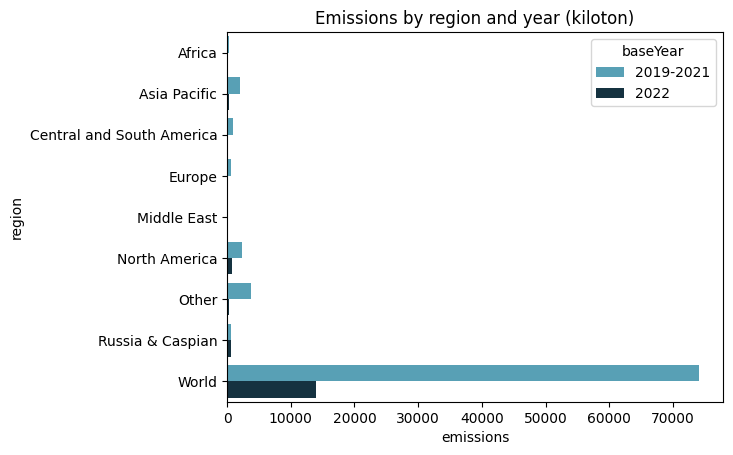

In [25]:
sns.barplot(data = df_emissions, y ="region", x ="emissions", hue = "baseYear", errorbar=None, palette=colors)
plt.title("Emissions by region and year (kiloton)")
plt.show()

### Remove the "World" region to evaluate the regions independently
La region "World" suma el total de regiones, como buena practica debemos evaluar las categorías por separado.

* Make a copy of the original data frame so as not to affect the data.
* Redefine the new data frame to filter only records that do not have the "World" attribute
* Graph the bar plot again

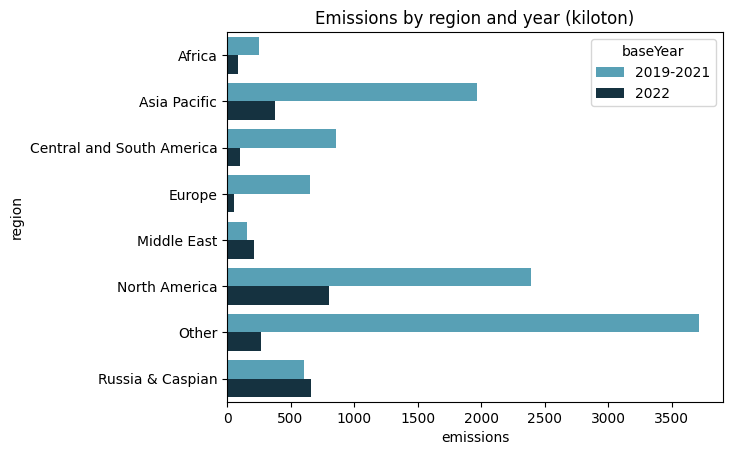

In [5]:
df_copy_emissions = df_emissions.copy()
df_copy_emissions = df_emissions[~(df_emissions["region"] == "World")]

sns.barplot(data = df_copy_emissions, y ="region", x ="emissions", hue="baseYear", errorbar=None, palette=colors)
plt.title("Emissions by region and year (kiloton)")
plt.show()

### Grouping by region adding total emissions
It is observed that the previous graphs are not adding the emissions by regions.

* Create the new data frame with only the "regions" and "emissions" columns
* For the seaborn graph to add the data instead of counting it, it is necessary to first group by region, add the values and reset the indices.
* Sort the dataframe in ascending order to decrease the cognitive load on the graph


In [8]:
columns=["region", "emissions"]
df_region_by_emmision = df_copy_emissions[columns]
df_region_by_emmision


,region,emissions
0,Africa,257.611206
1,Africa,0.052000
2,Africa,130.798996
3,Africa,69.741898
4,Africa,213.987000
...,...,...
1521,Russia & Caspian,16.973917
1522,Russia & Caspian,18.299999
1523,Russia & Caspian,780.916138
1524,Russia & Caspian,3.845616


In [9]:
df_region_by_emmision = df_region_by_emmision.groupby("region").sum().reset_index()
df_region_by_emmision["emissions"]

0     54197.152613
1    177699.611465
2     45639.989799
3     49208.996818
4     38095.798763
5     63347.409177
6     15997.357175
7     62421.612360
Name: emissions, dtype: float64

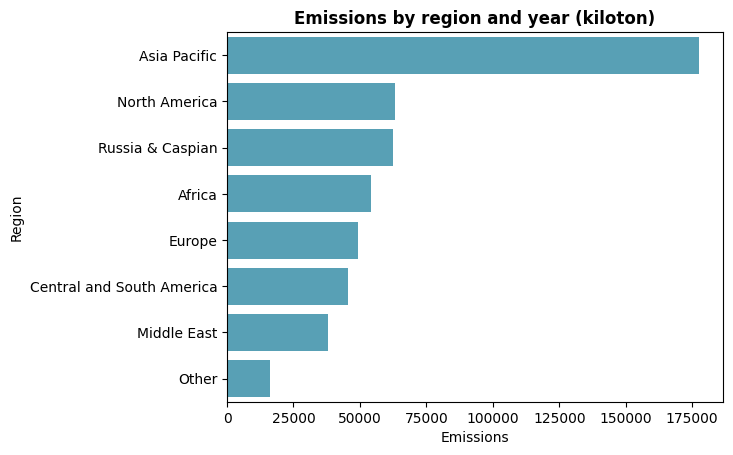

In [12]:
df_region_by_emmision = df_region_by_emmision.sort_values(by="emissions", ascending=False)

sns.barplot(data = df_region_by_emmision, y ="region", x ="emissions", errorbar=None, color = colors[0])
plt.ylabel("Region")
plt.xlabel("Emissions")
plt.title("Emissions by region and year (kiloton)", fontweight="bold")
plt.show()

### Question: 
#### What is the relationship between methane emissions and population by region?

* Reset the indices for continuous values


In [13]:
df_region_by_emmision = df_region_by_emmision.reset_index(drop=True)
df_region_by_emmision

,region,emissions
0,Asia Pacific,177699.611465
1,North America,63347.409177
2,Russia & Caspian,62421.612360
3,Africa,54197.152613
4,Europe,49208.996818
5,Central and South America,45639.989799
6,Middle East,38095.798763
7,Other,15997.357175


* Region "Other" eliminated due to lack of information:

In [14]:
df_region_by_emmision.drop(7, axis=0, inplace=True)
df_region_by_emmision

,region,emissions
0,Asia Pacific,177699.611465
1,North America,63347.409177
2,Russia & Caspian,62421.612360
3,Africa,54197.152613
4,Europe,49208.996818
5,Central and South America,45639.989799
6,Middle East,38095.798763


* In the Data frame there is no attribute related to the population, for this a new column is created with the population of each region.

In [15]:
population_region = np.array([4300,579,193,1216,746,669,411])
df_region_by_emmision["population"]= population_region
df_region_by_emmision

,region,emissions,population
0,Asia Pacific,177699.611465,4300
1,North America,63347.409177,579
2,Russia & Caspian,62421.612360,193
3,Africa,54197.152613,1216
4,Europe,49208.996818,746
5,Central and South America,45639.989799,669
6,Middle East,38095.798763,411


* Adding the "relation e/p" column (relation between emissions and populations), using a lambda functionn


In [16]:
df_region_by_emmision["relation e/p"] = df_region_by_emmision.apply(lambda x: round(x["emissions"] / x["population"], 0), axis=1)
df_region_by_emmision["relation e/p"] 

0     41.0
1    109.0
2    323.0
3     45.0
4     66.0
5     68.0
6     93.0
Name: relation e/p, dtype: float64

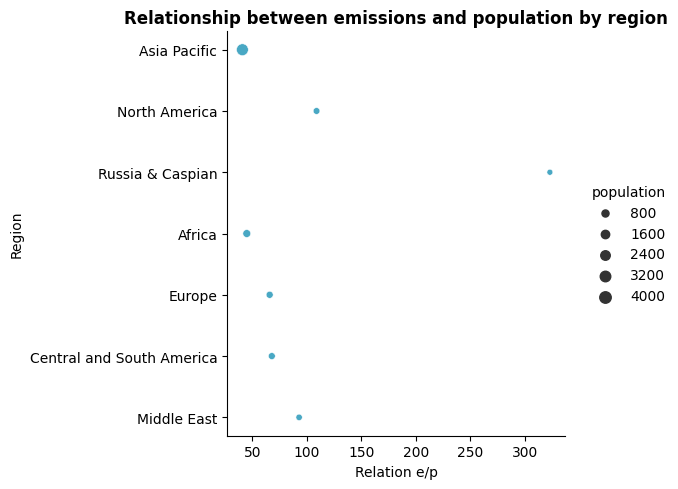

In [17]:
import warnings
warnings.filterwarnings("ignore")

sns.relplot(data=df_region_by_emmision, x="relation e/p",y="region", size="population", color = colors[0])
plt.ylabel("Region")
plt.xlabel("Relation e/p")
plt.title("Relationship between emissions and population by region", fontweight="bold")
plt.tight_layout()
plt.show();

#### *Description insights:*


* The region with the highest methane emissions per inhabitant is Russia and the Caspian Sea and the lowest is Africa.
* There is an indirect relationship between the amount of population and the amount of emissions per inhabitant.
* Use sns.relplot() to create scatterplots with "relation e/p" and "region", with a segmentation by "population"
___

### Question: 
#### Which productive sector generates more methane?
* Create the new data frame with only the "regions", "emissions" and "type" columns

In [18]:
columns_segment=["region", "emissions", "type"]
df_region_emmision_type = df_copy_emissions[columns_segment]
df_region_emmision_type

,region,emissions,type
0,Africa,257.611206,Agriculture
1,Africa,0.052000,Energy
2,Africa,130.798996,Energy
3,Africa,69.741898,Energy
4,Africa,213.987000,Energy
...,...,...,...
1521,Russia & Caspian,16.973917,Energy
1522,Russia & Caspian,18.299999,Energy
1523,Russia & Caspian,780.916138,Energy
1524,Russia & Caspian,3.845616,Other


* Group by "region" and "type" to sum emissions and sort in ascending order

In [19]:
df_region_emmision_type = df_region_emmision_type.groupby(["region","type"]).sum().reset_index().sort_values(by="emissions", ascending=False)
df_region_emmision_type.head()

,region,type,emissions
5,Asia Pacific,Energy,83240.171487
4,Asia Pacific,Agriculture,63241.493486
29,Russia & Caspian,Energy,53325.714394
21,North America,Energy,41798.716642
17,Middle East,Energy,32540.824141


* Discard the "Orther" category for "region" and "type" due to lack of information

In [20]:
df_region_emmision_type = df_region_emmision_type[~(df_region_emmision_type["type"] == "Other") & ~(df_region_emmision_type["region"] == "Other")]
df_region_emmision_type

,region,type,emissions
5,Asia Pacific,Energy,83240.171487
4,Asia Pacific,Agriculture,63241.493486
29,Russia & Caspian,Energy,53325.714394
21,North America,Energy,41798.716642
17,Middle East,Energy,32540.824141
7,Asia Pacific,Waste,27273.937113
1,Africa,Energy,26535.878049
8,Central and South America,Agriculture,23573.521675
12,Europe,Agriculture,21201.239498
0,Africa,Agriculture,16892.979230


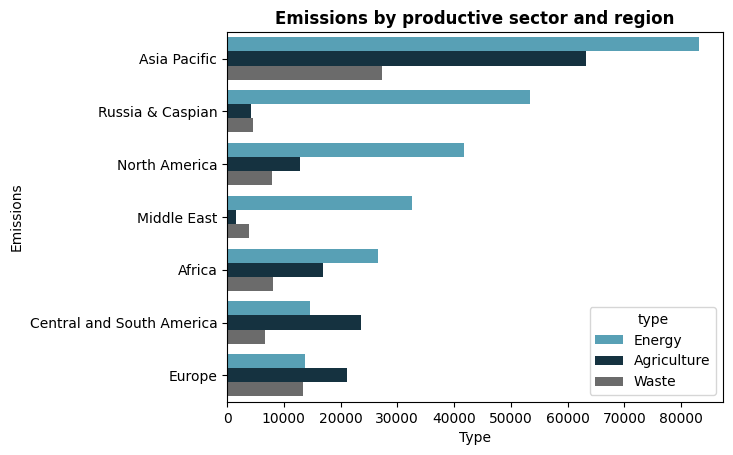

In [28]:
sns.barplot(data=df_region_emmision_type, y="region", x="emissions", hue="type", palette=colors)
plt.ylabel("Emissions")
plt.xlabel("Type")
plt.title("Emissions by productive sector and region", fontweight="bold")
plt.show()

#### *Description insights:*
* The productive sector with the highest emissions is the energy sector in most regions followed by agriculture.
* The Central and South America and Europe Regions emit more emissions from agriculture
___


### Emissions by world powers

* Create the data frame with the columns "country" and "emissions"
* Group by "country", and sort by "emisions" in ascending order

In [30]:
columns_world_powers=["country", "emissions"]
df_world_powers = df_copy_emissions[columns_world_powers]
df_world_powers = df_world_powers.groupby(["country"]).sum().reset_index().sort_values(by="emissions", ascending=False)
df_world_powers.head()

,country,emissions
16,China,81048.371586
98,United States,48604.877296
77,Russia,42432.929804
38,India,34852.007386
10,Brazil,21720.838126


*   Creat the list "world_powers"
*   Filter the data by matches from the "world_powers" list

In [31]:
world_powers=["United States", "Russia", "China", "Germany", "United Kingdom", "France", "Japan", "Israel", "Saudi Arabia", "United Arab Emirates"]
df_world_powers = df_world_powers[df_world_powers["country"].str.contains('|'.join(world_powers), case=False)].sort_values(by="emissions", ascending=False)
df_world_powers

,country,emissions
16,China,81048.371586
98,United States,48604.877296
77,Russia,42432.929804
78,Saudi Arabia,7206.823957
96,United Arab Emirates,3391.336533
97,United Kingdom,2791.774137
33,Germany,2648.582686
30,France,2622.229239
44,Japan,1823.469380
42,Israel,409.388339


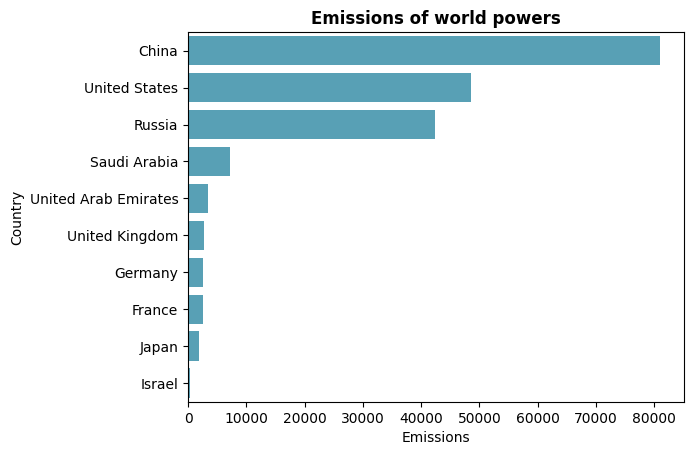

In [32]:
sns.barplot(data=df_world_powers, x="emissions", y="country", errorbar=None, color = colors[0])
plt.xlabel("Emissions")
plt.ylabel("Country")
plt.title("Emissions of world powers", fontweight="bold")
plt.show()

#### Comparison of emissions of the three great world powers by sector
* Create the data frame with the columns "country", "emissions" and "segment"


In [33]:
columns_3_world_powers=["country", "emissions", "segment"]
df_us_chi_rus_emmision = df_copy_emissions[columns_3_world_powers]
df_us_chi_rus_emmision

,country,emissions,segment
0,Algeria,257.611206,Total
1,Algeria,0.052000,Bioenergy
2,Algeria,130.798996,Gas pipelines and LNG facilities
3,Algeria,69.741898,Gas pipelines and LNG facilities
4,Algeria,213.987000,Onshore gas
...,...,...,...
1521,Uzbekistan,16.973917,Other from oil and gas
1522,Uzbekistan,18.299999,Satellite-detected large oil and gas emissions
1523,Uzbekistan,780.916138,Total
1524,Uzbekistan,3.845616,Total


* Filter the data to determine matches to the selected_countries list

In [34]:
selected_countries = ["United States", "Russia", "China"]

df_us_chi_rus_emmision = df_us_chi_rus_emmision[df_us_chi_rus_emmision["country"].isin(selected_countries)]
df_us_chi_rus_emmision

,country,emissions,segment
460,China,18501.914062,Total
461,China,984.200012,Bioenergy
462,China,5418.770020,Coking coal
463,China,552.119995,Gas pipelines and LNG facilities
464,China,294.390991,Gas pipelines and LNG facilities
...,...,...,...
1487,Russia,1014.000000,Satellite-detected large oil and gas emissions
1488,Russia,2591.629883,Steam coal
1489,Russia,18078.083984,Total
1490,Russia,323.421631,Total


* Remove records with category "Total" from column "segment"

In [35]:
df_us_chi_rus_emmision = df_us_chi_rus_emmision[~(df_us_chi_rus_emmision["segment"]=="Total")]
df_us_chi_rus_emmision.head()

,country,emissions,segment
461,China,984.200012,Bioenergy
462,China,5418.770020,Coking coal
463,China,552.119995,Gas pipelines and LNG facilities
464,China,294.390991,Gas pipelines and LNG facilities
465,China,16.911100,Offshore gas


* Group by "country", and sort by "emisions" in ascending order

In [36]:
df_us_chi_rus_emmision = df_us_chi_rus_emmision.groupby(["country", "segment"]).sum().reset_index().sort_values(by="emissions", ascending=False)
df_us_chi_rus_emmision.head()

,country,segment,emissions
9,China,Steam coal,14809.000000
16,Russia,Onshore oil,6305.391022
26,United States,Onshore gas,5569.159912
1,China,Coking coal,5418.770020
27,United States,Onshore oil,4934.302002


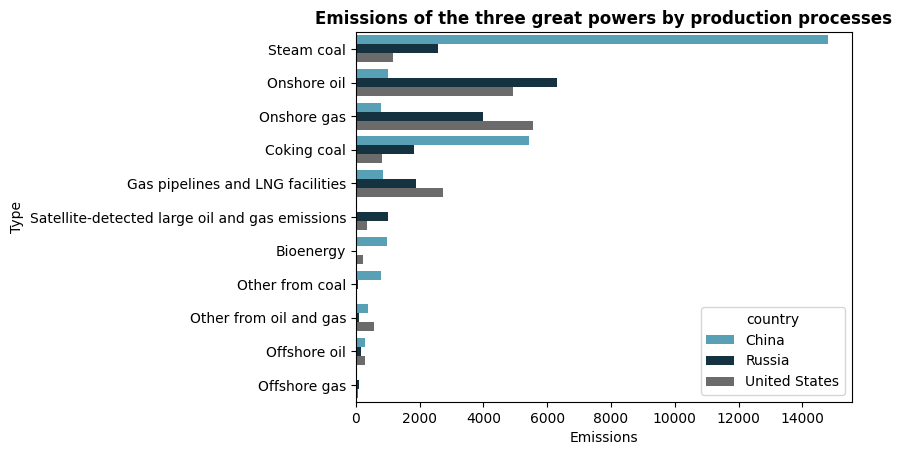

In [37]:
sns.barplot(data=df_us_chi_rus_emmision, x="emissions",y="segment", hue="country", errorbar=None, palette = colors)
plt.xlabel("Emissions")
plt.ylabel("Type")
plt.title("Emissions of the three great powers by production processes", fontweight="bold")
plt.show()

#### *Description insights:*
* The processes by which China emits the most emissions is by steam coal and Coking coal
* The processes by which Russia and the United States emit the most emissions are Onshore oil and Onshore gas

___

### Colombia emissions analysis:

In [38]:
# Create the data frame with the columns "country", "emissions" and "segment"
columns_colombia=["country", "emissions", "segment"]
df_colombia_emmision = df_copy_emissions[columns_colombia]
df_colombia_emmision.head()

# Filter the data to determine matches to the column_colombia list
column_colombia = ["Colombia"]
df_colombia_emmision = df_colombia_emmision[df_colombia_emmision["country"].isin(column_colombia)]
df_colombia_emmision.head()

# Remove records with category "Total" from column "segment"
df_colombia_emmision = df_colombia_emmision[~(df_colombia_emmision["segment"]=="Total")]

# Group by "segment" and sort by "emisions" in ascending order
df_colombia_emmision = df_colombia_emmision.groupby(["segment"]).sum().reset_index().sort_values(by="emissions", ascending=False)
df_colombia_emmision = df_colombia_emmision.drop("country", axis= 1)
df_colombia_emmision.head()

,segment,emissions
8,Steam coal,357.726013
5,Onshore oil,256.080601
4,Onshore gas,48.133900
0,Bioenergy,42.119999
2,Gas pipelines and LNG facilities,31.595000


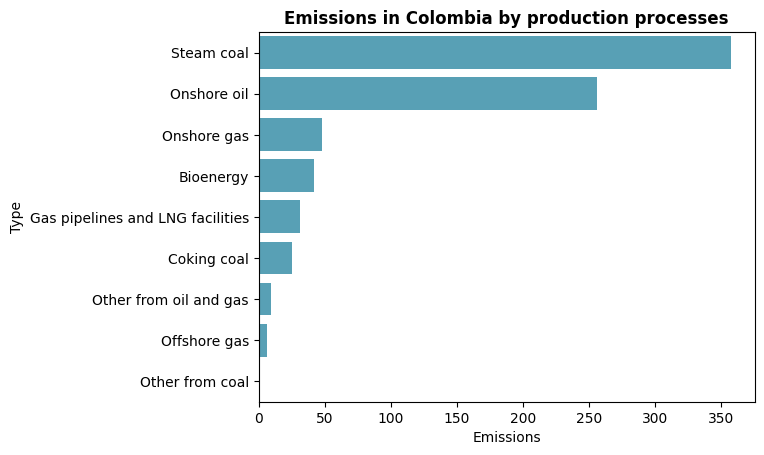

In [39]:
sns.barplot(data=df_colombia_emmision, x="emissions", y="segment", errorbar=None, color = colors[0])
plt.xlabel("Emissions")
plt.ylabel("Type")
plt.title("Emissions in Colombia by production processes", fontweight="bold")
plt.show()

#### *Description insights:*
* The processes by which Colombia emits more emissions is by thermal coal and terrestrial oil
